In [9]:
import tensorflow as tf

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
##Generate Fake Data

In [12]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [13]:
training_data = np.load('TF_intro.npz')

In [17]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 29.0377 - 246ms/epoch - 8ms/step
Epoch 2/100
32/32 - 0s - loss: 4.7357 - 29ms/epoch - 917us/step
Epoch 3/100
32/32 - 0s - loss: 1.4896 - 30ms/epoch - 925us/step
Epoch 4/100
32/32 - 0s - loss: 0.6525 - 33ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4127 - 32ms/epoch - 999us/step
Epoch 6/100
32/32 - 0s - loss: 0.3512 - 38ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3355 - 32ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3210 - 32ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3242 - 29ms/epoch - 919us/step
Epoch 10/100
32/32 - 0s - loss: 0.3269 - 38ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3257 - 30ms/epoch - 932us/step
Epoch 12/100
32/32 - 0s - loss: 0.3207 - 30ms/epoch - 938us/step
Epoch 13/100
32/32 - 0s - loss: 0.3258 - 35ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3273 - 30ms/epoch - 951us/step
Epoch 15/100
32/32 - 0s - loss: 0.3297 - 29ms/epoch - 921us/step
Epoch 16/100
32/32 - 0s - loss: 0.3240 - 29ms/

In [18]:
##Extract weights and biases

In [19]:
model.layers[0].get_weights()

[array([[ 2.0108078],
        [-3.0136185]], dtype=float32),
 array([5.018442], dtype=float32)]

In [20]:
##Extract the outputs (make predictions)

In [22]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-23. ],
       [-18.4],
       [-28.4],
       [ -1.5],
       [  6.3],
       [  2.5],
       [-24.4],
       [  5. ],
       [  5.5],
       [ 25.1],
       [  5.1],
       [-28.2],
       [-14.3],
       [-33.1],
       [  9.7],
       [-21. ],
       [  5.9],
       [ 41.2],
       [ 27.4],
       [  5.3],
       [  9.2],
       [ 28.8],
       [-20.1],
       [-29.2],
       [ 36.4],
       [  5.8],
       [ 21. ],
       [ 35.7],
       [ 14. ],
       [-42.5],
       [ 15.6],
       [-12.8],
       [ -1.9],
       [ 17. ],
       [  7. ],
       [-35.1],
       [ 18.9],
       [ 30.7],
       [ -8.9],
       [ 33.4],
       [-33.4],
       [-18.3],
       [ 29.8],
       [-15.7],
       [ 17.7],
       [-27.6],
       [-26.7],
       [ -8.9],
       [  7.3],
       [ 34.2],
       [ -5.1],
       [-12.5],
       [-16.3],
       [ 28.6],
       [-13.8],
       [ 16.7],
       [ -2.7],
       [-13.3],
       [ 23.9],
       [ -6.4],
       [  9.8],
       [  4.5],
       [

In [23]:
training_data['targets'].round(1)

array([[-23.5],
       [-18.4],
       [-27.7],
       [ -1.4],
       [  5.5],
       [  3.3],
       [-24. ],
       [  4. ],
       [  6.3],
       [ 25.7],
       [  6. ],
       [-29. ],
       [-13.5],
       [-33.7],
       [  9.5],
       [-21.3],
       [  6.1],
       [ 40.8],
       [ 26.4],
       [  4.3],
       [  8.2],
       [ 28.3],
       [-19.6],
       [-28.4],
       [ 36.4],
       [  5.8],
       [ 20.2],
       [ 34.7],
       [ 14.7],
       [-41.4],
       [ 15.5],
       [-13.4],
       [ -1.9],
       [ 17.6],
       [  7.2],
       [-35.3],
       [ 19.2],
       [ 30.7],
       [ -8.4],
       [ 33.4],
       [-34. ],
       [-17.5],
       [ 29.3],
       [-16.6],
       [ 17.7],
       [-26.9],
       [-26.7],
       [ -9.6],
       [  7.8],
       [ 34.7],
       [ -5. ],
       [-12.3],
       [-15.5],
       [ 27.8],
       [-13.9],
       [ 16.8],
       [ -2.1],
       [-13. ],
       [ 24.6],
       [ -5.4],
       [  8.9],
       [  4.8],
       [

In [24]:
##Plot the predictions

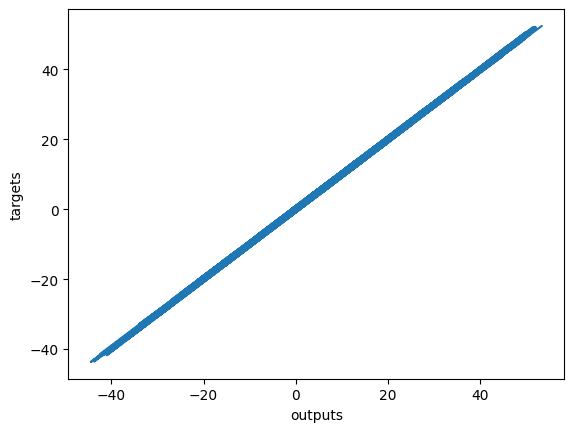

In [25]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()